In [181]:
from graphviz import Graph, Digraph
from PIL import Image
from IPython.display import display, Image
import pandas as pd
import numpy as np 
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [149]:
# read data
df = pd.read_csv('Input_data/pokemon_all_gen.csv')
df.head(10)

#                         Name           Type  Total  HP  Attack  Defense  \
0  1                    Bulbasaur  Grass  Poison    318  45      49       49   
1  2                      Ivysaur  Grass  Poison    405  60      62       63   
2  3                     Venusaur  Grass  Poison    525  80      82       83   
3  3      Venusaur  Mega Venusaur  Grass  Poison    625  80     100      123   
4  4                   Charmander           Fire    309  39      52       43   
5  5                   Charmeleon           Fire    405  58      64       58   
6  6                    Charizard   Fire  Flying    534  78      84       78   
7  6  Charizard  Mega Charizard X   Fire  Dragon    634  78     130      111   
8  6  Charizard  Mega Charizard Y   Fire  Flying    634  78     104       78   
9  7                     Squirtle          Water    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  
0       65       65     45  
1       80       80     60  
2      100      100     80  
3      122      120     80  
4       60       50     65  
5       80       65     80  
6      109       85    100  
7      130       85    100  
8      159      115    100  
9       50       64     43

# split the dual types into single types

In [150]:
# Split Type column on space and explode to get one type per row
df['TypeList'] = df['Type'].str.split()  # split on space
df_exploded = df.explode('TypeList')
df_exploded.head(20)


#                         Name           Type  Total  HP  Attack  Defense  \
0   1                    Bulbasaur  Grass  Poison    318  45      49       49   
0   1                    Bulbasaur  Grass  Poison    318  45      49       49   
1   2                      Ivysaur  Grass  Poison    405  60      62       63   
1   2                      Ivysaur  Grass  Poison    405  60      62       63   
2   3                     Venusaur  Grass  Poison    525  80      82       83   
2   3                     Venusaur  Grass  Poison    525  80      82       83   
3   3      Venusaur  Mega Venusaur  Grass  Poison    625  80     100      123   
3   3      Venusaur  Mega Venusaur  Grass  Poison    625  80     100      123   
4   4                   Charmander           Fire    309  39      52       43   
5   5                   Charmeleon           Fire    405  58      64       58   
6   6                    Charizard   Fire  Flying    534  78      84       78   
6   6                    Charizard   Fire  Flying    534  78      84       78   
7   6  Charizard  Mega Charizard X   Fire  Dragon    634  78     130      111   
7   6  Charizard  Mega Charizard X   Fire  Dragon    634  78     130      111   
8   6  Charizard  Mega Charizard Y   Fire  Flying    634  78     104       78   
8   6  Charizard  Mega Charizard Y   Fire  Flying    634  78     104       78   
9   7                     Squirtle          Water    314  44      48       65   
10  8                    Wartortle          Water    405  59      63       80   
11  9                    Blastoise          Water    530  79      83      100   
12  9    Blastoise  Mega Blastoise          Water    630  79     103      120   

    Sp. Atk  Sp. Def  Speed TypeList  
0        65       65     45    Grass  
0        65       65     45   Poison  
1        80       80     60    Grass  
1        80       80     60   Poison  
2       100      100     80    Grass  
2       100      100     80   Poison  
3       122      120     80    Grass  
3       122      120     80   Poison  
4        60       50     65     Fire  
5        80       65     80     Fire  
6       109       85    100     Fire  
6       109       85    100   Flying  
7       130       85    100     Fire  
7       130       85    100   Dragon  
8       159      115    100     Fire  
8       159      115    100   Flying  
9        50       64     43    Water  
10       65       80     58    Water  
11       85      105     78    Water  
12      135      115     78    Water

# Colors will be handy throughout

In [151]:
type_colors = {
    'Normal':   '#A8A77A',
    'Fire':     '#EE8130',
    'Water':    '#6390F0',
    'Electric': '#F7D02C',
    'Grass':    '#7AC74C',
    'Ice':      '#96D9D6',
    'Fighting': '#C22E28',
    'Poison':   '#A33EA1',
    'Ground':   '#E2BF65',
    'Flying':   '#A98FF3',
    'Psychic':  '#F95587',
    'Bug':      '#A6B91A',
    'Rock':     '#B6A136',
    'Ghost':    '#735797',
    'Dragon':   '#6F35FC',
    'Dark':     '#705746',
    'Steel':    '#B7B7CE',
    'Fairy':    '#D685AD',
}

# count instances of each type (single type + dual)

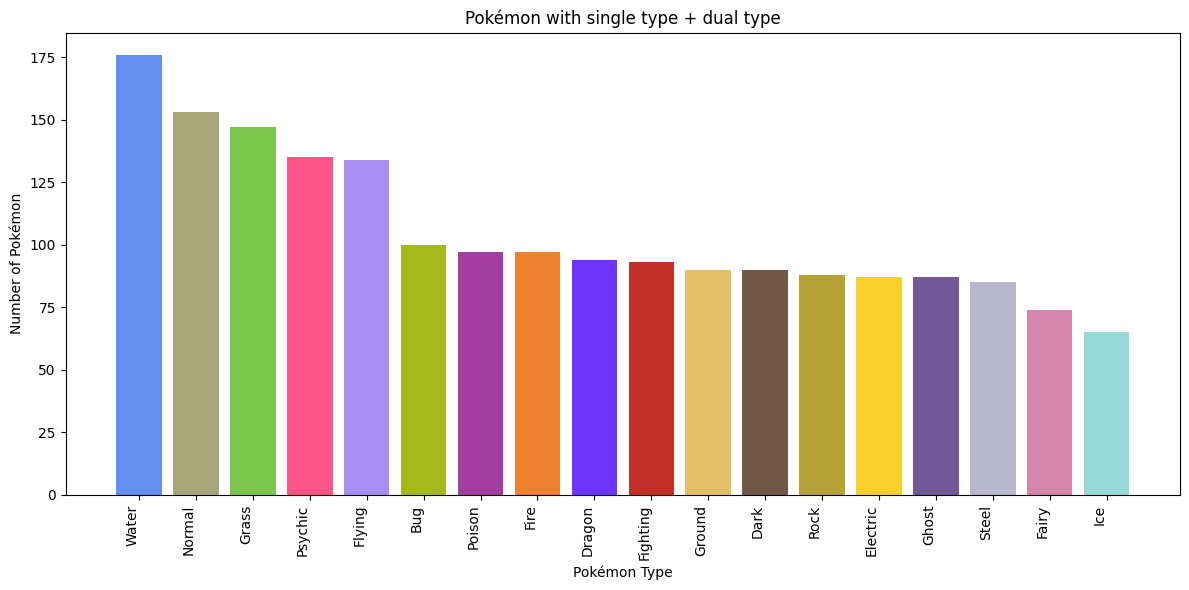

In [152]:
# Count Pokémon per type (single or part of dual)
counts_at_least_one_type = df_exploded['TypeList'].value_counts()

# Assign colors based on type
bar_colors = [type_colors.get(t, '#777777') for t in counts_by_type.index]  # default gray if missing

# Plot
plt.figure(figsize=(12,6))
plt.bar(counts_at_least_one_type.index, counts_at_least_one_type.values, color=bar_colors)
plt.xlabel('Pokémon Type')
plt.ylabel('Number of Pokémon')
plt.title('Pokémon with single type + dual type')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

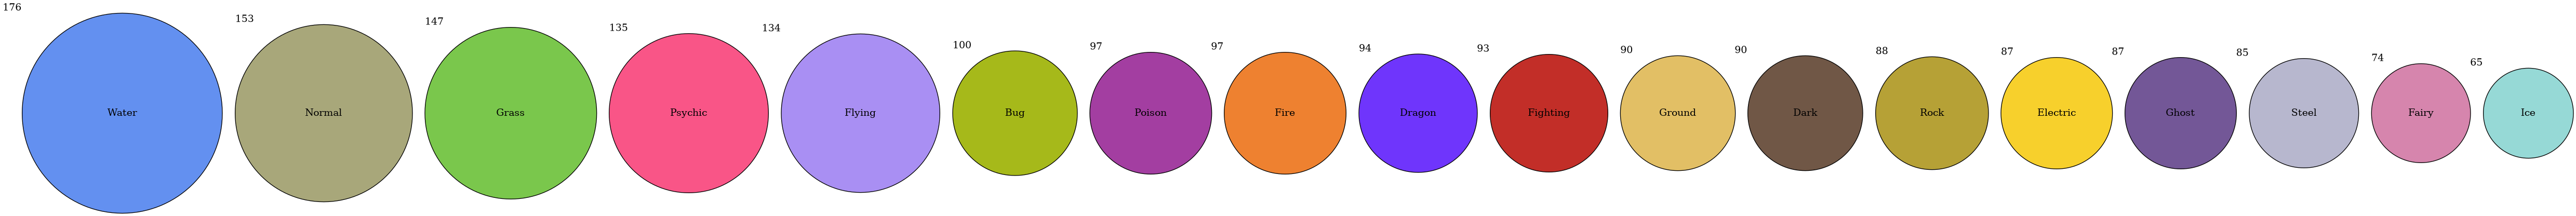

In [153]:
# Initialize Graphviz
dot = Digraph('G', format='png')

# Add nodes only
for poke_type, count in counts_by_type.items():
    size = 0.5 + count * 0.02  # adjust scaling factor as needed
    dot.node(
        poke_type,
        label=poke_type,
        width=str(size),
        height=str(size),
        style='filled',
        fillcolor=type_colors.get(poke_type, '#CCCCCC'),  # default gray if missing
        xlabel=str(count)  # this shows the count above the node
    )

# Render
png_bytes = dot.pipe(format='png')
Image(png_bytes)

In [154]:
# Get all unique types
ptypes = sorted({t for sublist in df['TypeList'] for t in sublist})
ptypes

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

# count all possible pairings

In [155]:
# Initialize matrix with zeros
type_counts_matrix = pd.DataFrame(0, index=ptypes, columns=ptypes, dtype=int)

# Count type pair combinations
for types in df['TypeList']:
    # For single-type Pokémon, increment diagonal
    if len(types) == 1:
        t = types[0]
        type_counts_matrix.loc[t, t] += 1
    else:
        # For multi-type Pokémon, increment all pairwise combinations (symmetric)
        for t1, t2 in combinations(types, 2):
            type_counts_matrix.loc[t1, t2] += 1
            type_counts_matrix.loc[t2, t1] += 1  # make symmetric

type_counts_matrix

Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
Bug        25     1       0         4      2         5     4      14      1   
Dark        1    16       5         2      3         4     5       8      3   
Dragon      0     5      13         5      1         3     4       9      5   
Electric    4     2       5        37      2         3     1       8      1   
Fairy       2     3       1         2     21         1     0       4      2   
Fighting    5     4       3         3      1        30     8       4      2   
Fire        4     5       4         1      0         8    37       7      8   
Flying     14     8       9         8      4         4     7       4      3   
Ghost       1     3       5         1      2         2     8       3     19   
Grass       6     7       7         3      5         5     2       7     16   
Ground      2     4       9         2      0         1     4       4      6   
Ice         2     3       6         2      1         1     1       2      1   
Normal      0     5       2         2      5         4     2      31      2   
Poison     13     7       4         3      2         5     3       3      5   
Psychic     3     4       5         1     10         6     4       9      4   
Rock        6     2       2         4      3         1     5       6      0   
Steel       7     3       6         4      8         4     1       3      5   
Water       5     8       8         3      4         6     1       8      4   

          Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
Bug           6       2    2       0      13        3     6      7      5  
Dark          7       4    3       5       7        4     2      3      8  
Dragon        7       9    6       2       4        5     2      6      8  
Electric      3       2    2       2       3        1     4      4      3  
Fairy         5       0    1       5       2       10     3      8      4  
Fighting      5       1    1       4       5        6     1      4      6  
Fire          2       4    1       2       3        4     5      1      1  
Flying        7       4    2      31       3        9     6      3      8  
Ghost        16       6    1       2       5        4     0      5      4  
Grass        47       3    3       5      16        5     3      3      4  
Ground        3      17    3       3       4        2     9      7     10  
Ice           3       3   22       0       0        5     3      2      8  
Normal        5       3    0      82       2        7     0      0      1  
Poison       16       4    0       2      16        3     3      2      6  
Psychic       5       2    5       7       3       47     3     10      7  
Rock          3       9    3       0       3        3    20      7     11  
Steel         3       7    2       0       2       10     7     12      1  
Water         4      10    8       1       6        7    11      1     81

# Heat Map

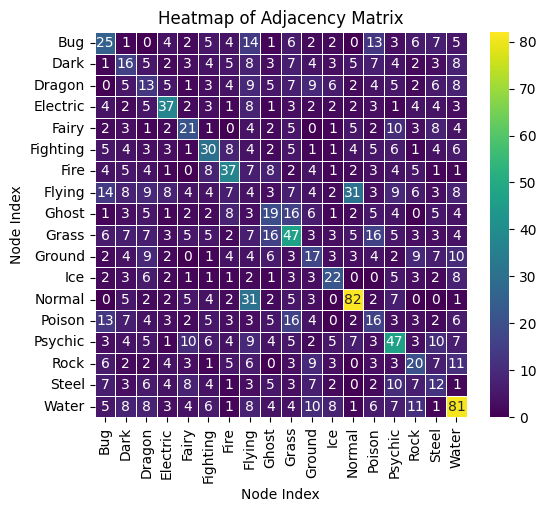

In [156]:
# Create the heatmap
plt.figure(figsize=(6, 5)) # Adjust figure size as needed
sns.heatmap(type_counts_matrix, annot=True, cmap='viridis', linewidths=.5, cbar=True)

# Add labels and title
plt.title('Heatmap of Adjacency Matrix')
plt.xlabel('Node Index')
plt.ylabel('Node Index')

# Display the plot
plt.show()

# count only single types and visualize the most popular

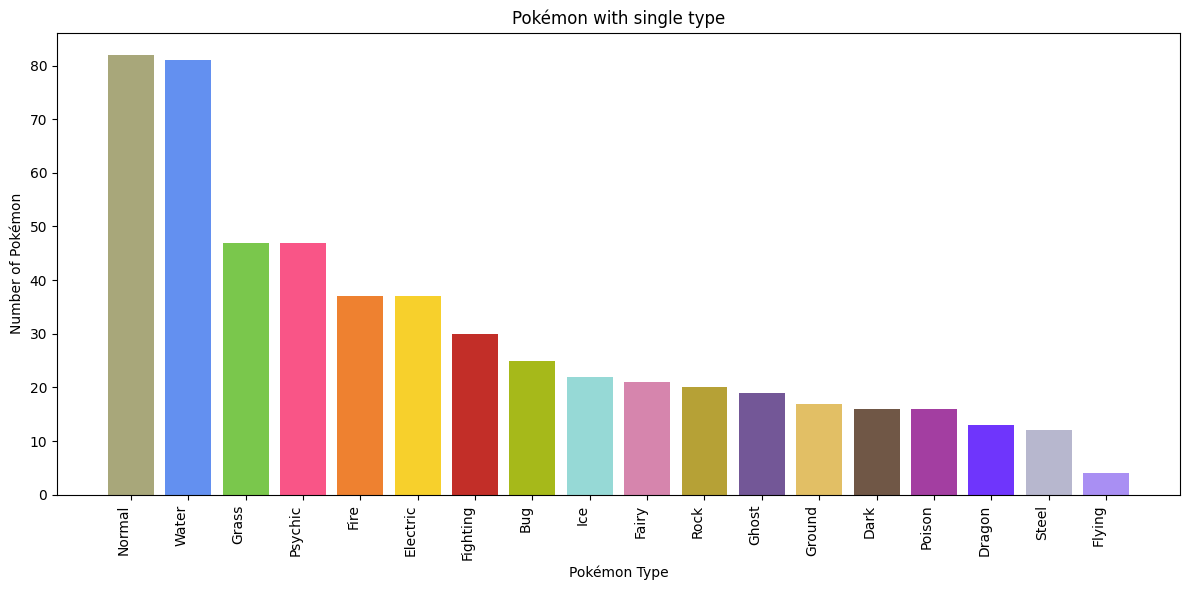

In [157]:
# type_counts_matrix is your DataFrame with single types on rows and columns
single_type_counts = type_counts_matrix.values.diagonal()

# To make it a Series with type names as index
single_type_counts = pd.Series(single_type_counts, index=type_counts_matrix.index)
single_type_counts_sorted = single_type_counts.sort_values(ascending=False)

# Assign colors based on type
bar_colors = [type_colors.get(t, '#777777') for t in single_type_counts_sorted.index]  # default gray if missing

# Plot
plt.figure(figsize=(12,6))
plt.bar(single_type_counts_sorted.index, single_type_counts_sorted.values, color=bar_colors)
plt.xlabel('Pokémon Type')
plt.ylabel('Number of Pokémon')
plt.title('Pokémon with single type')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

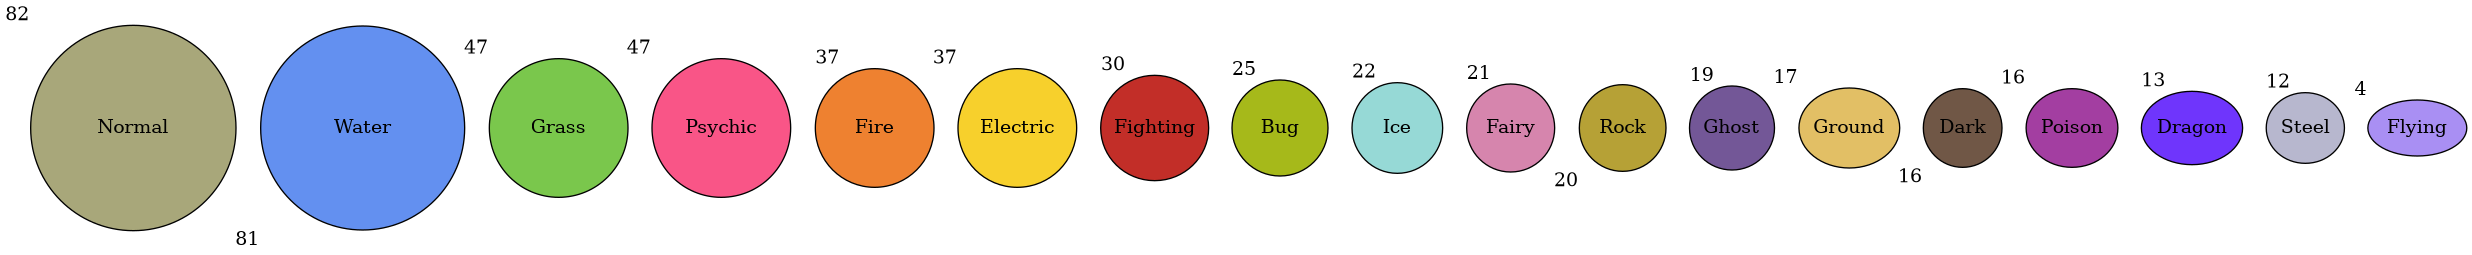

In [158]:
# Initialize Graphviz
dot = Digraph('G', format='png')

# Add nodes with size proportional to count
for poke_type, count in single_type_counts_sorted.items():
    size = 0.5 + count * 0.02  # adjust scale factor as needed
    dot.node(
        poke_type,
        label=poke_type,
        width=str(size),
        height=str(size),
        style='filled',
        fillcolor=type_colors.get(poke_type, '#777777'),  # default gray
        xlabel=str(count)  # this shows the count above the node
    )

# Render inline
png_bytes = dot.pipe(format='png')
Image(png_bytes)


from now on we will use these numbers to scale single types

# Visualize the connections too

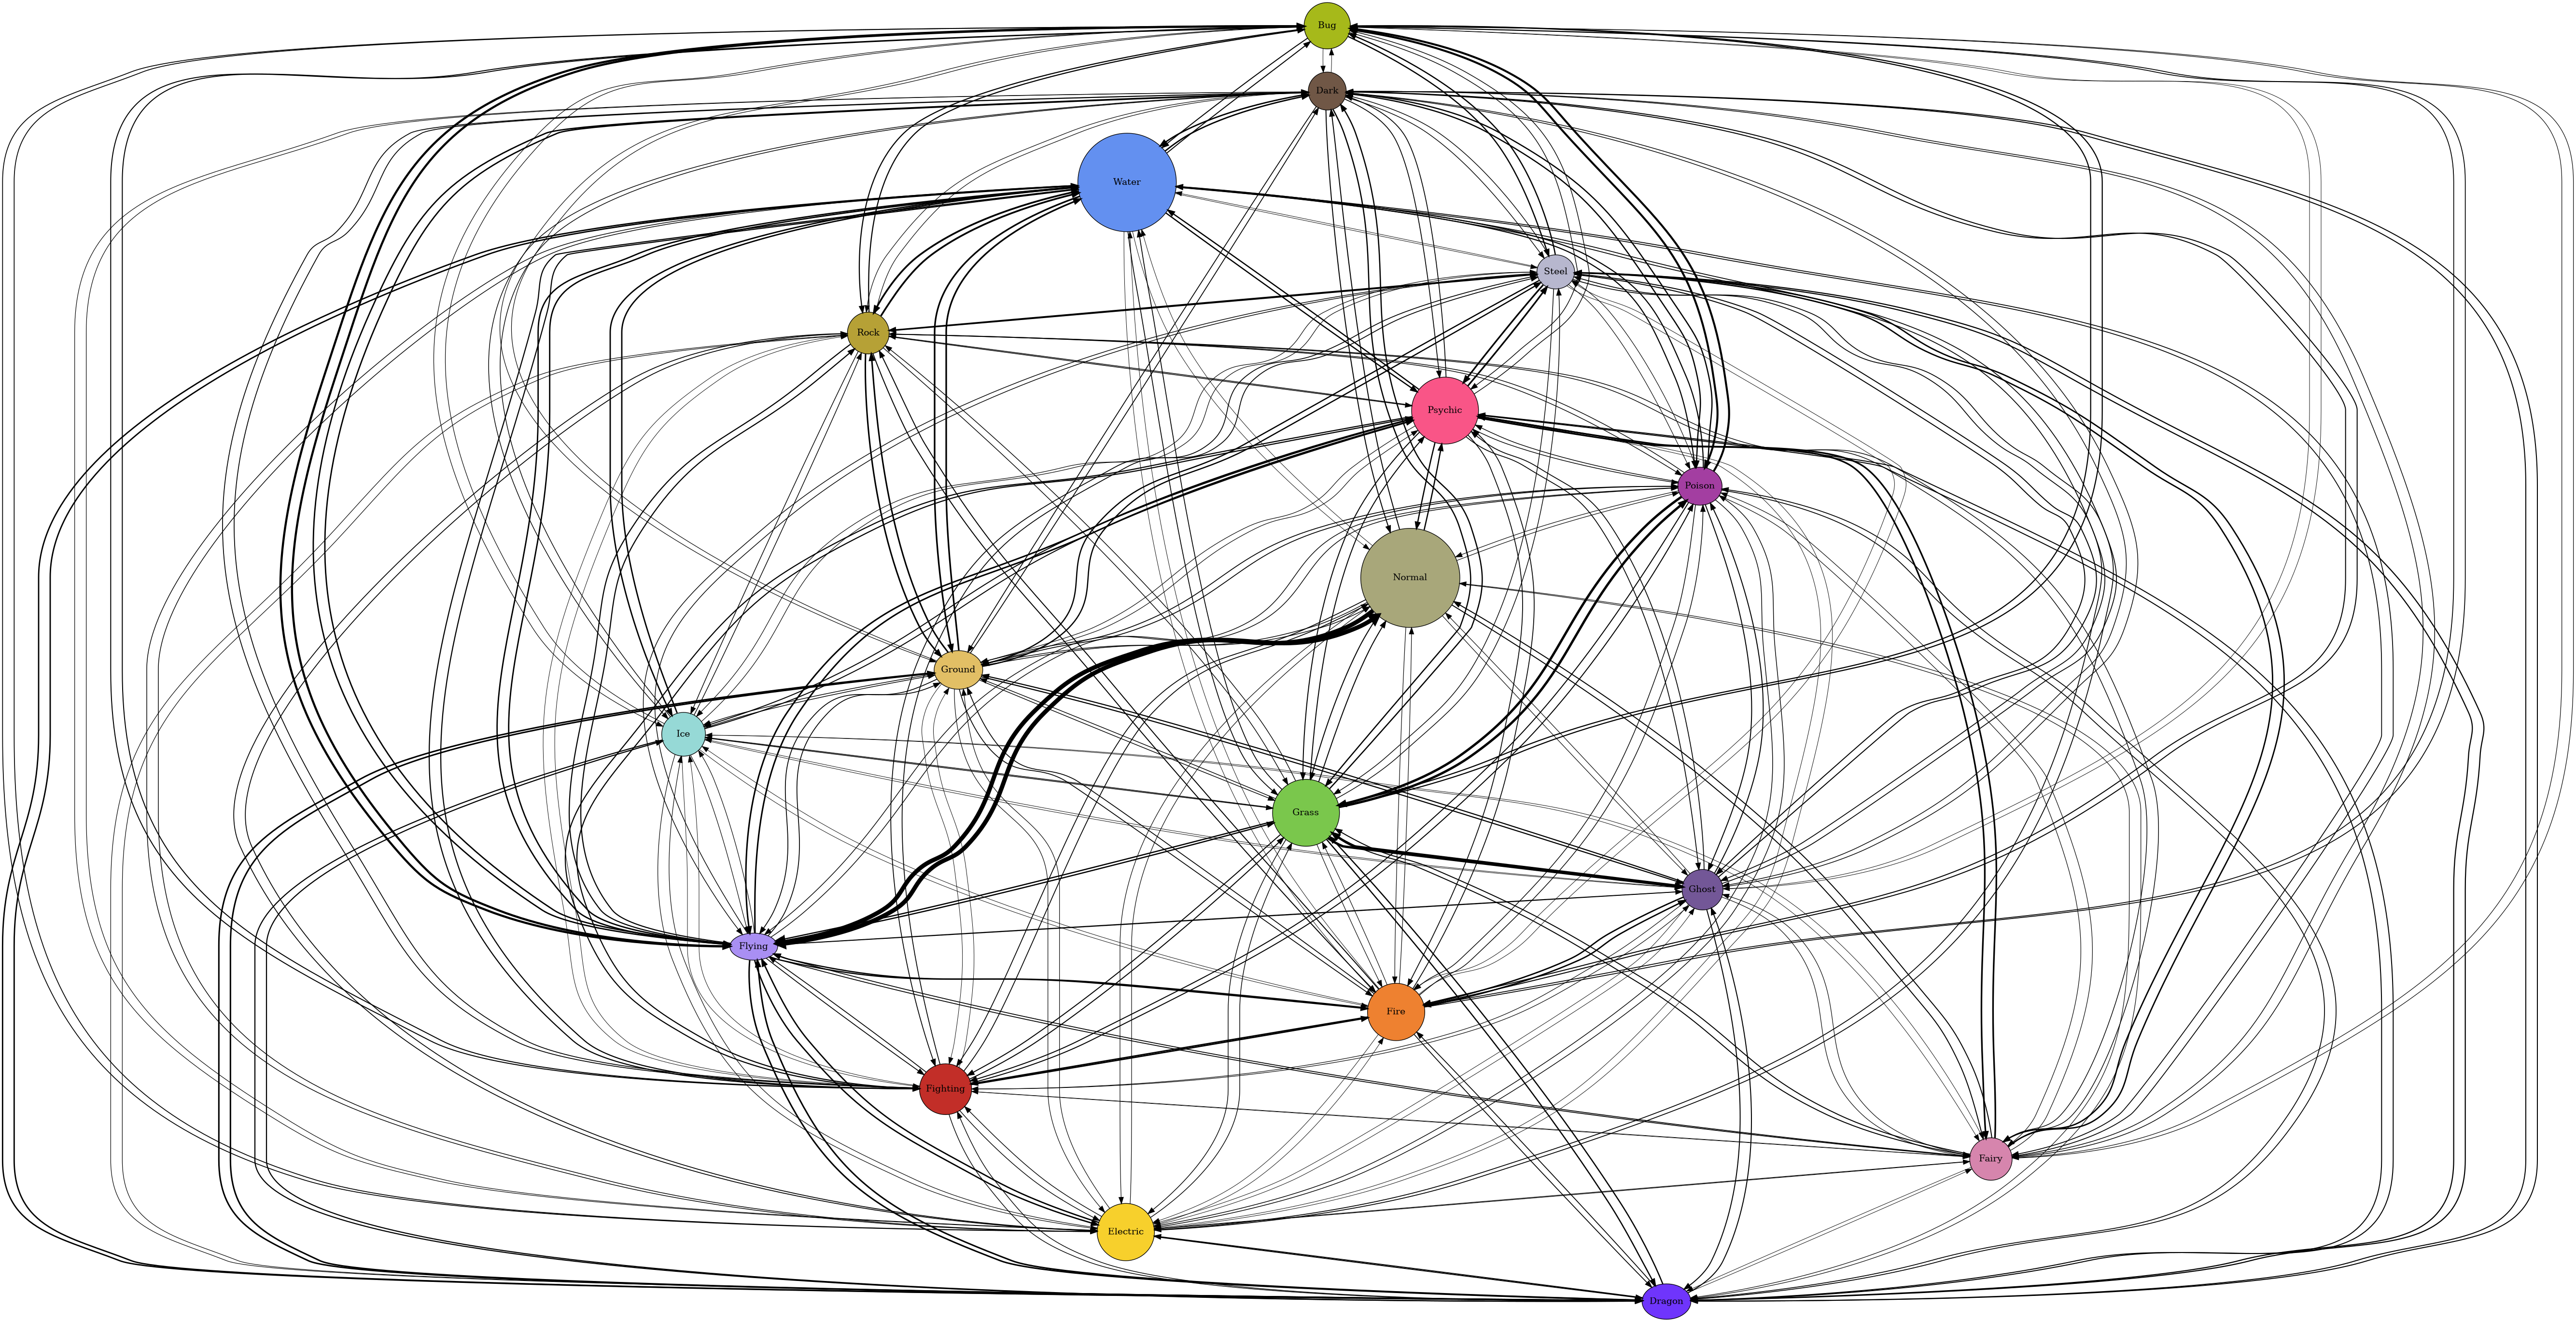

In [159]:
# Initialize directed graph
dot = Digraph(format='png')

# Add nodes with size proportional to single-type count
for poke_type, count in single_type_counts.items():
    size = 0.5 + count * 0.02
    dot.node(
        poke_type,
        label=poke_type,
        width=str(size),
        height=str(size),
        style='filled',
        fillcolor=type_colors.get(poke_type, '#777777')
    )

# Add edges for mixed types (off-diagonal)
for t1 in type_counts_matrix.index:
    for t2 in type_counts_matrix.columns:
        if t1 != t2 and type_counts_matrix.loc[t1, t2] > 0:
            count = type_counts_matrix.loc[t1, t2]
            dot.edge(
                t1,
                t2,
                penwidth=str(0.5 + count * 0.2)  # scale width by count
            )

# Render inline
png_bytes = dot.pipe(format='png')
Image(png_bytes)

# Only show the strongest connection for each

In [176]:
# For each source, find all strongest outgoing edges (exclude self-loops)
strongest_edges_list = []

for source in type_counts_matrix.index:
    row = type_counts_matrix.loc[source].copy()
    # row[source] = 0  # exclude self-loop
    max_count = row.max()
    if max_count > 0:
        targets = row[row == max_count].index
        tie = len(targets) > 1  # check if there is a tie
        for target in targets:
            strongest_edges_list.append((source, target, max_count, tie))

# Convert to DataFrame
strongest_edges_df = pd.DataFrame(strongest_edges_list, columns=['source', 'target', 'count', 'tie'])
strongest_edges_df


source    target  count    tie
0        Bug       Bug     25  False
1       Dark      Dark     16  False
2     Dragon    Dragon     13  False
3   Electric  Electric     37  False
4      Fairy     Fairy     21  False
5   Fighting  Fighting     30  False
6       Fire      Fire     37  False
7     Flying    Normal     31  False
8      Ghost     Ghost     19  False
9      Grass     Grass     47  False
10    Ground    Ground     17  False
11       Ice       Ice     22  False
12    Normal    Normal     82  False
13    Poison     Grass     16   True
14    Poison    Poison     16   True
15   Psychic   Psychic     47  False
16      Rock      Rock     20  False
17     Steel     Steel     12  False
18     Water     Water     81  False

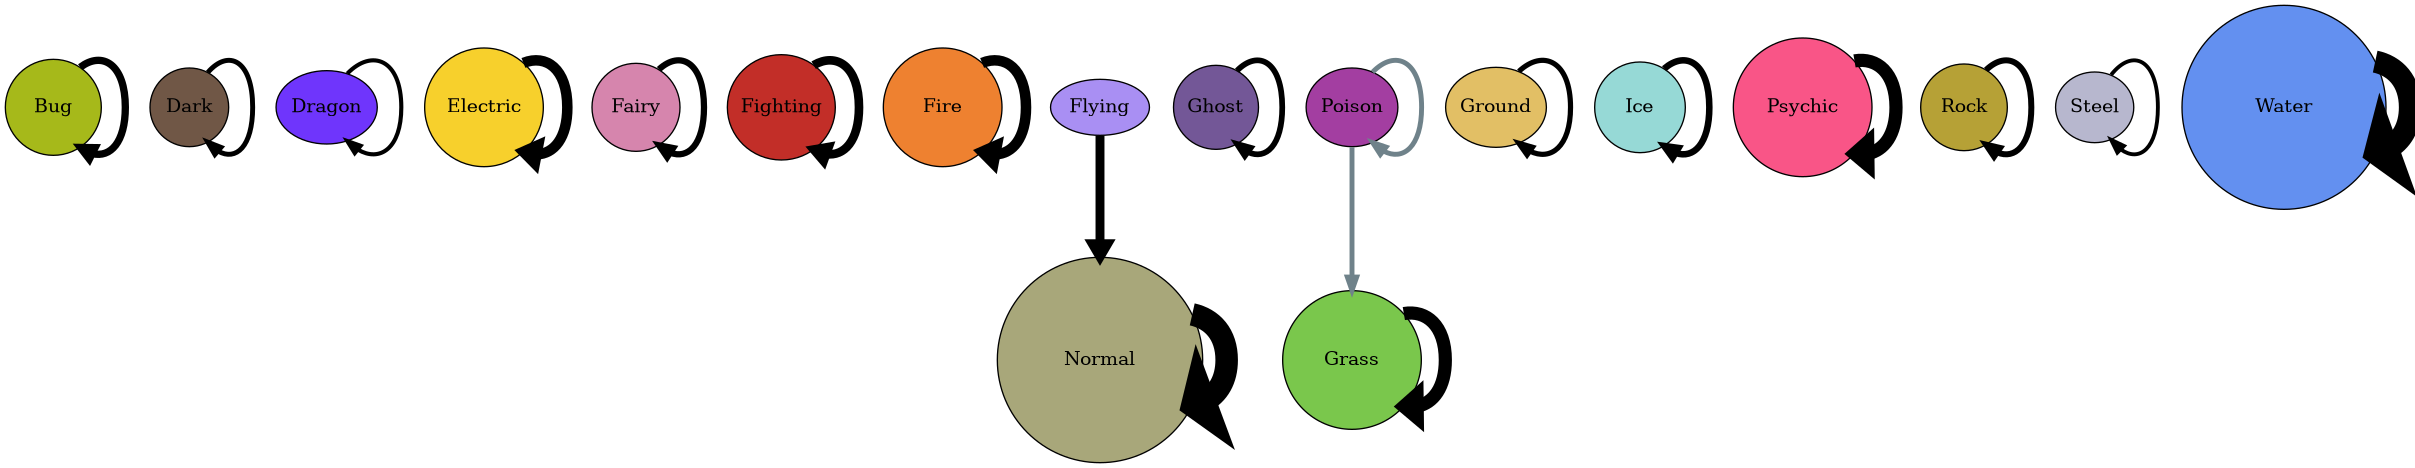

In [177]:
# Initialize Graphviz
dot = Digraph(format='png')

# Add nodes
for poke_type, count in single_type_counts.items():
    size = 0.5 + count * 0.02
    dot.node(
        poke_type,
        label=poke_type,
        width=str(size),
        height=str(size),
        style='filled',
        fillcolor=type_colors.get(poke_type, '#777777')
    )

# Add edges with color for ties
for _, row in strongest_edges_df.iterrows():
    edge_color = '#6f828a' if row['tie'] else 'black'
    dot.edge(
        row['source'],
        row['target'],
        penwidth=str(0.5 + row['count'] * 0.2),
        color=edge_color
    )

# Render network
png_bytes = dot.pipe(format='png')
Image(png_bytes)

Too many of them are single type, must exlude those and see new results

# Only show the strongest outward connection (avoiding self loops)

In [184]:

# For each source, find all strongest outgoing edges (exclude self-loops)
strongest_edges_list = []

for source in type_counts_matrix.index:
    row = type_counts_matrix.loc[source].copy()
    row[source] = 0  # exclude self-loop
    max_count = row.max()
    if max_count > 0:
        targets = row[row == max_count].index
        tie = len(targets) > 1  # check if there is a tie
        for target in targets:
            strongest_edges_list.append((source, target, max_count, tie))

# Convert to DataFrame
strongest_edges_df = pd.DataFrame(strongest_edges_list, columns=['source', 'target', 'count', 'tie'])
strongest_edges_df

source    target  count    tie
0        Bug    Flying     14  False
1       Dark    Flying      8   True
2       Dark     Water      8   True
3     Dragon    Flying      9   True
4     Dragon    Ground      9   True
5   Electric    Flying      8  False
6      Fairy   Psychic     10  False
7   Fighting      Fire      8  False
8       Fire  Fighting      8   True
9       Fire     Ghost      8   True
10    Flying    Normal     31  False
11     Ghost     Grass     16  False
12     Grass     Ghost     16   True
13     Grass    Poison     16   True
14    Ground     Water     10  False
15       Ice     Water      8  False
16    Normal    Flying     31  False
17    Poison     Grass     16  False
18   Psychic     Fairy     10   True
19   Psychic     Steel     10   True
20      Rock     Water     11  False
21     Steel   Psychic     10  False
22     Water      Rock     11  False

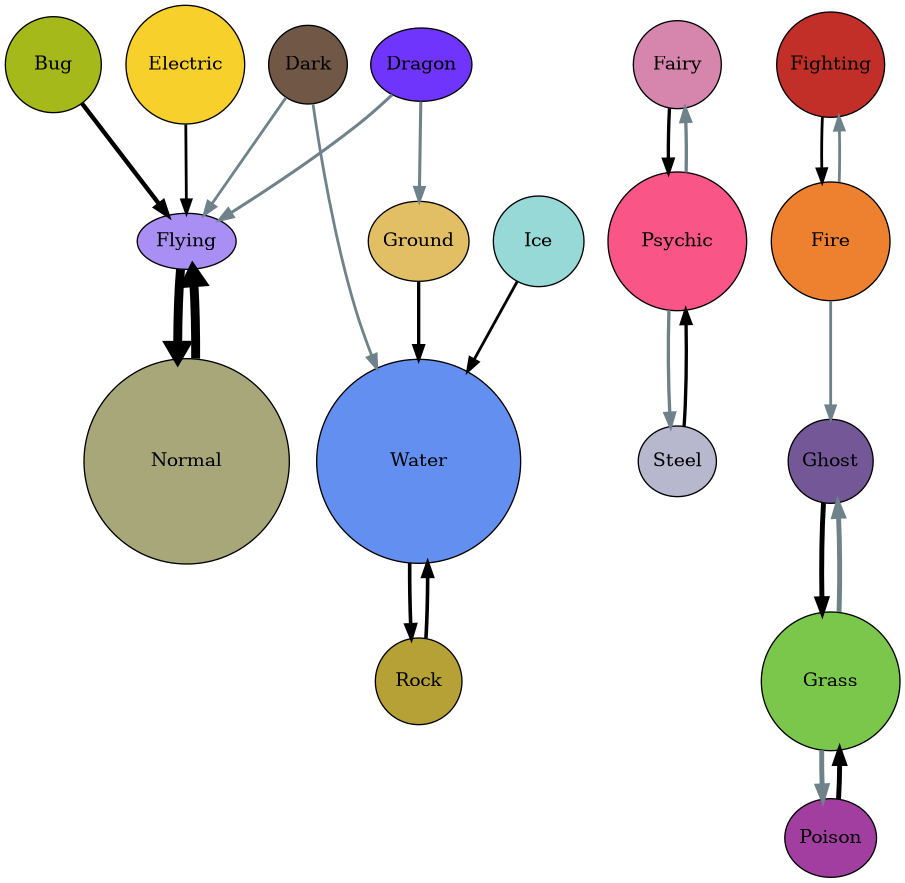

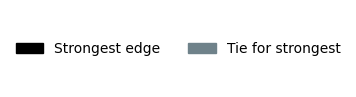

In [187]:
# Initialize Graphviz
dot = Digraph(format='png')

# Add nodes
for poke_type, count in single_type_counts.items():
    size = 0.5 + count * 0.02
    dot.node(
        poke_type,
        label=poke_type,
        width=str(size),
        height=str(size),
        style='filled',
        fillcolor=type_colors.get(poke_type, '#777777')
    )

# Add edges with color for ties
for _, row in strongest_edges_df.iterrows():
    edge_color = '#6f828a' if row['tie'] else 'black'
    dot.edge(
        row['source'],
        row['target'],
        penwidth=str(0.5 + row['count'] * 0.2),
        color=edge_color
    )

# --- Display Graphviz network ---
png_bytes = dot.pipe(format='png')
display(Image(png_bytes))

# --- Create a legend for edge colors ---
fig, ax = plt.subplots(figsize=(4, 1))
ax.axis('off')  # hide axes

# Create patches for tie vs non-tie
patches = [
    mpatches.Patch(color='black', label='Strongest edge'),
    mpatches.Patch(color='#6f828a', label='Tie for strongest')
]

ax.legend(handles=patches, loc='center', frameon=False, ncol=2)
plt.show()
